In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import kstest
import seaborn as sns

In [60]:
sns.set_theme()

In [4]:
raw_df = pd.read_csv('../data/metabolic_syndrome.csv')

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
# categorical variables = ['Sex','Marital','Race']

In [43]:
## drop indentifying columns
desired_columns = raw_df.columns[~raw_df.columns.isin(['seqn'])]
raw_df =  raw_df[desired_columns]

### Dealing with null values

In [55]:
raw_df.isnull().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [53]:
# determine proportion of each column that contains null values
nulls_count = (raw_df.isnull().sum()/raw_df.shape[0])*100
nulls_count.sort_values(ascending = False)

Marital              8.663057
Income               4.872970
WaistCirc            3.540192
BMI                  1.082882
Age                  0.000000
Sex                  0.000000
Race                 0.000000
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

In [57]:
# Marital status
missing_marital_status = raw_df[raw_df['Marital'].isna()]
missing_marital_status.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
9,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0
10,57,Male,NaN,9000.0,White,107.8,28.0,0,4.16,6.0,100,35,98,1
24,22,Female,NaN,300.0,Hispanic,78.9,23.3,0,5.33,4.1,90,42,68,0
42,22,Male,NaN,1600.0,White,110.7,32.6,0,8.83,8.0,112,43,178,1
64,65,Male,NaN,2000.0,White,127.5,40.0,0,8.73,9.3,70,63,169,1


In [ ]:
# There is no sensible way to impute the Marital Status. Hence, the nulls will be dropped

In [62]:
raw_df = raw_df.dropna(subset='Marital')

In [64]:
# determine proportion of each column that contains null values
nulls_count = (raw_df.isnull().sum()/raw_df.shape[0])*100
nulls_count.sort_values(ascending = False)

Income               4.696762
WaistCirc            3.784770
BMI                  1.185591
Age                  0.000000
Sex                  0.000000
Marital              0.000000
Race                 0.000000
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

In [65]:
# Income
missing_income = raw_df[raw_df['Income'].isna()]
missing_income.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
33,30,Male,Single,NaN,Black,130.3,41.0,0,9.39,7.5,108,29,194,1
76,76,Female,Divorced,NaN,White,101.2,28.0,0,8.72,2.6,95,51,62,0
96,79,Male,Single,NaN,Black,95.0,25.8,0,9.04,7.4,128,54,62,0
103,56,Female,Married,NaN,Black,93.8,26.4,0,3.23,5.4,95,70,60,0


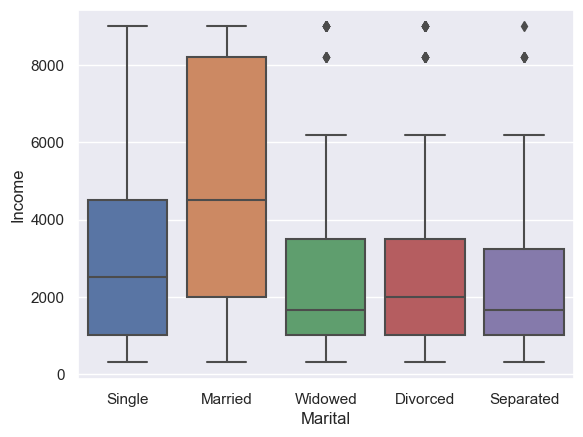

In [69]:
sns.boxplot(x='Marital', y='Income', data=raw_df)
plt.show()

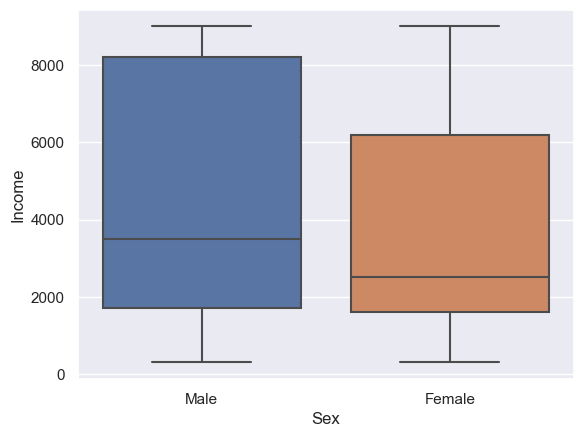

In [70]:
sns.boxplot(x='Sex', y='Income', data=raw_df)
plt.show()

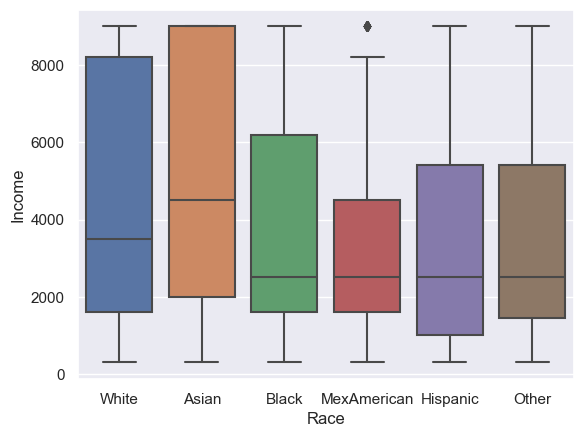

In [71]:
sns.boxplot(x='Race', y='Income', data=raw_df)
plt.show()

In [ ]:
# All three categories seem to have a meaningful impact on the income distributions

In [73]:
# get the median for the combination of categories
group_median=raw_df.groupby(['Marital','Sex','Race'])['Income'].transform('median')
# fill null values for income based on the group statistics
raw_df['Income'].fillna(group_median, inplace=True)

In [ ]:
# WaistCirc

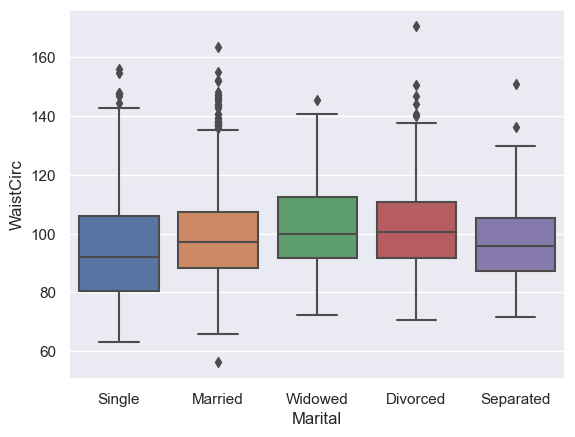

In [74]:
sns.boxplot(x='Marital', y='WaistCirc', data=raw_df)
plt.show()

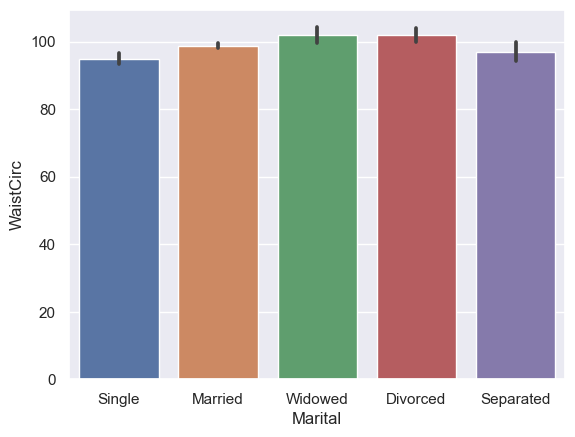

In [77]:
sns.barplot(x='Marital', y='WaistCirc', data=raw_df)
plt.show()

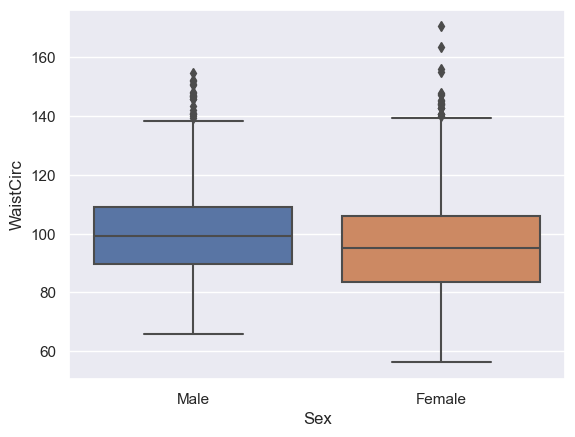

In [75]:
sns.boxplot(x='Sex', y='WaistCirc', data=raw_df)
plt.show()

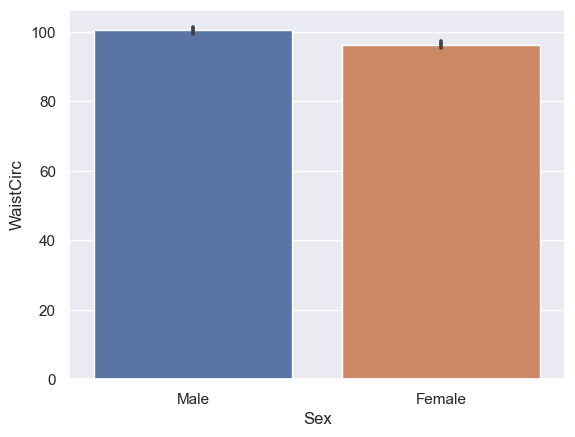

In [78]:
sns.barplot(x='Sex', y='WaistCirc', data=raw_df)
plt.show()

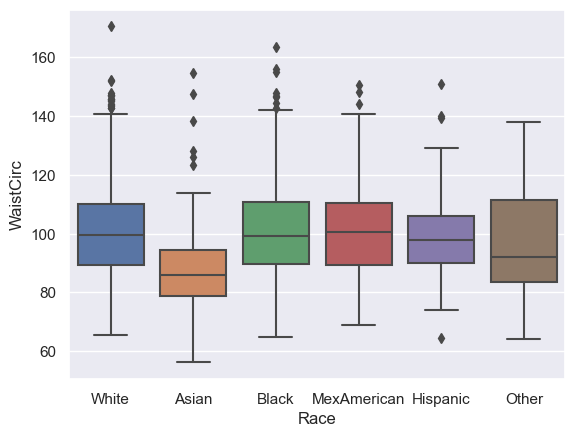

In [76]:
sns.boxplot(x='Race', y='WaistCirc', data=raw_df)
plt.show()

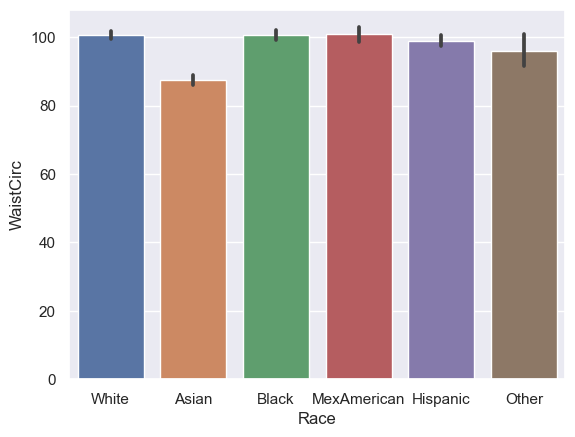

In [80]:
sns.barplot(x='Race', y='WaistCirc', data=raw_df)
plt.show()

In [ ]:
# Only Race categorization seems to be meaningful for the WaistCirc attribute

In [81]:
# get the median for the combination of categories
group_median=raw_df.groupby(['Race'])['WaistCirc'].transform('median')
# fill null values for income based on the group statistics
raw_df['WaistCirc'].fillna(group_median, inplace=True)

In [ ]:
#BMI

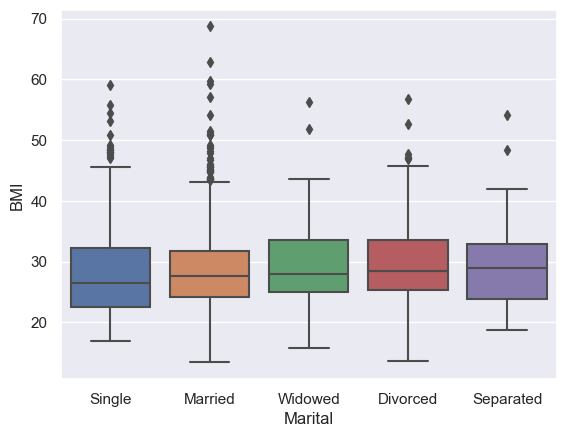

In [82]:
sns.boxplot(x='Marital', y='BMI', data=raw_df)
plt.show()

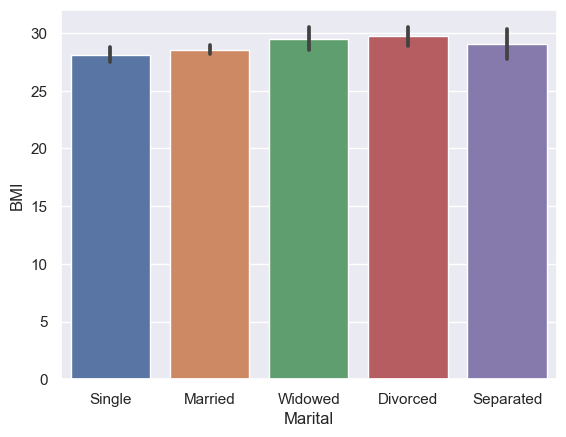

In [83]:
sns.barplot(x='Marital', y='BMI', data=raw_df)
plt.show()

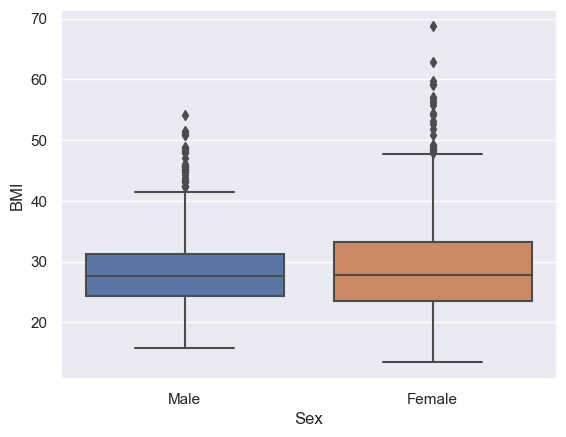

In [84]:
sns.boxplot(x='Sex', y='BMI', data=raw_df)
plt.show()

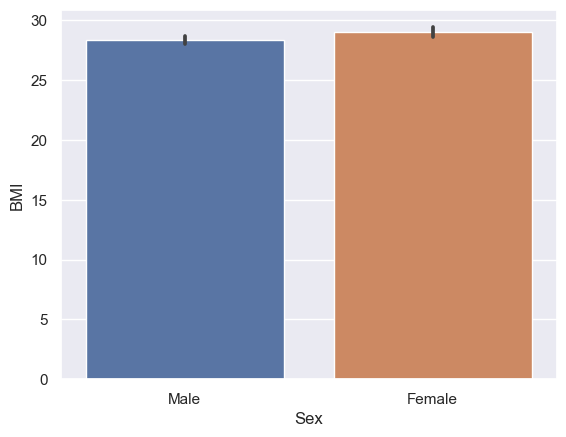

In [85]:
sns.barplot(x='Sex', y='BMI', data=raw_df)
plt.show()

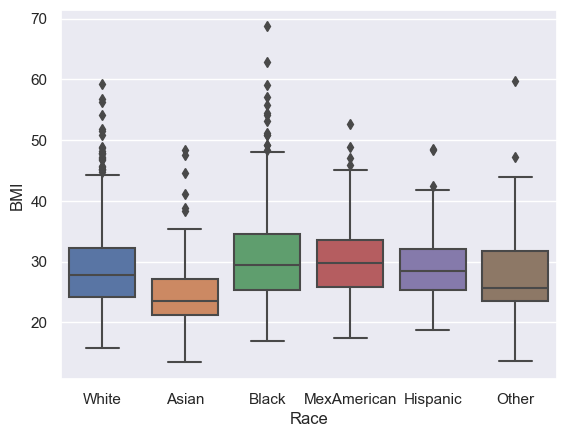

In [86]:
sns.boxplot(x='Race', y='BMI', data=raw_df)
plt.show()

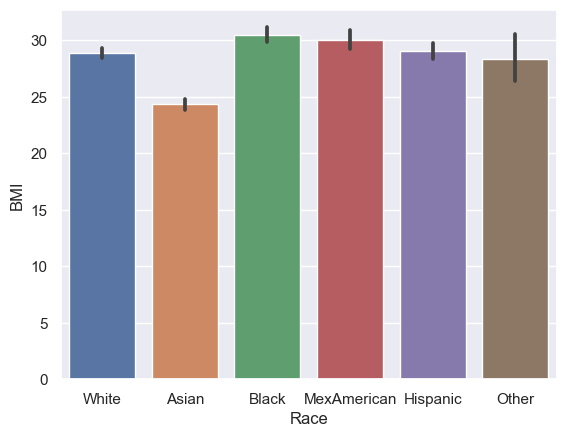

In [87]:
sns.barplot(x='Race', y='BMI', data=raw_df)
plt.show()

In [88]:
# get the median for the combination of categories
group_median=raw_df.groupby(['Marital','Sex','Race'])['BMI'].transform('median')
# fill null values for income based on the group statistics
raw_df['BMI'].fillna(group_median, inplace=True)

In [89]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2193 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2193 non-null   int64  
 1   Sex                2193 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2192 non-null   float64
 4   Race               2193 non-null   object 
 5   WaistCirc          2193 non-null   float64
 6   BMI                2193 non-null   float64
 7   Albuminuria        2193 non-null   int64  
 8   UrAlbCr            2193 non-null   float64
 9   UricAcid           2193 non-null   float64
 10  BloodGlucose       2193 non-null   int64  
 11  HDL                2193 non-null   int64  
 12  Triglycerides      2193 non-null   int64  
 13  MetabolicSyndrome  2193 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 257.0+ KB


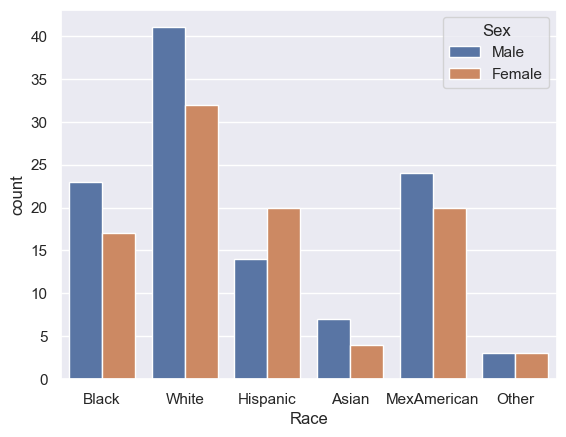

In [66]:
sns.countplot(data=missing_marital_status,x='Race',hue='Sex')
plt.show()

In [30]:
stat, p = shapiro(raw_df['BMI'].dropna())
p

1.2052038514686988e-29

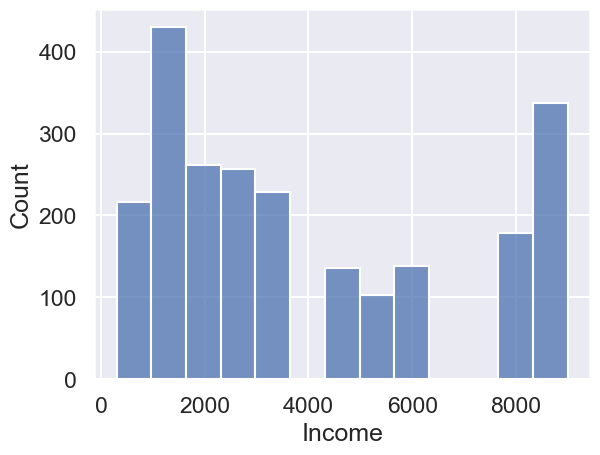

In [18]:
sns.histplot(raw_df['BMI'])
plt.show()

In [28]:
stat, p = shapiro(raw_df['Income'].dropna())
p

3.366619560540373e-41

In [33]:
stat, p = kstest(raw_df['Income'].dropna(),'norm')
stat

1.0

In [34]:
raw_df['Income']

0       8200.0
1       4500.0
2        800.0
3       2000.0
4          NaN
         ...  
2396    1000.0
2397    2000.0
2398     800.0
2399    8200.0
2400    6200.0
Name: Income, Length: 2401, dtype: float64